In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from datetime import timedelta
import logging

In [ ]:
df=pd.read_csv("train_test_preprocessing2")

In [ ]:

logging.basicConfig(
    filename='logging_visualisation_file1.txt',
    level=logging.DEBUG,
    format='%(asctime)s.%(msecs)03d %(levelname)s - %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S',
    filemode="a"

)

In [6]:
def feature_plot(col,data):
    fig,ax=plt.subplots(1,2,figsize=(30,10))
    df[col].value_counts().plot.bar(ax=ax[0],color=["#FFC0CB","#00008B"])
    ax[0].set_xlabel(col)
    ax[0].set_ylabel("Value_counts per category")
    ax[0].set_title(f"Value_counts per category of {col}")
    ax[1].set_xlabel(col)
    ax[1].set_ylabel("Mean Transaction Revenue per category")
    ax[1].set_title(f"Mean Transaction Revenue per category of {col}")
    df.groupby(col)["totals.transactionRevenue"].sum().sort_values(ascending=False).plot.bar(ax=ax[1],color=["#800000","#00FF00"])

In [7]:
def Zero_Revenue_category_separation(x,series):
    if x in series:
        return "other"
    else:
        return x

In [8]:
def value_counts_sumRevenue(col1,data):
    pd.set_option('display.max_rows', None)
    value_count_df=pd.DataFrame(data[col1].value_counts().sort_values(ascending=False).reset_index())
    revenue_sum=data.groupby(col1)["totals.transactionRevenue"].sum().sort_values(ascending=False)
    return value_count_df, revenue_sum

In [9]:
missing_value_object_df=pd.DataFrame()
for i in df.columns:
    if df[i].dtypes==object:
        missing_values=(df[i].isnull().sum())/len(df)
        missing_value_object_df.loc[i,"%missing_values"]=missing_values

<AxesSubplot:>

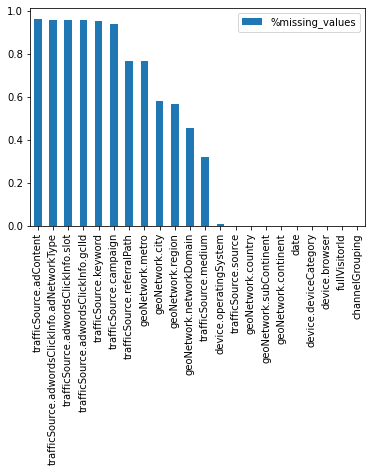

In [44]:
missing_value_object_df.sort_values(by="%missing_values",ascending=False).plot.bar()

#### Columns "trafficSource.adContent" "trafficSource.adwordsClickInfo.adNetworkType", "trafficSource.adwordsClickInfo.slot" , "trafficSource.adwordsClickInfo.gclId" , trafficSource.keyword" have more than 94% missing values so let's drop these columns.

In [10]:
logging.info("missing value validation started")
high_missing_value_df=missing_value_object_df[missing_value_object_df["%missing_values"]>.94]

for i in df.columns:
    if i in high_missing_value_df.index:
        df=df.drop(i,axis=1)
logging.info("missing value validation completed")

In [79]:
## I will replace some categorical column into numeric feature by Label Encoding.
categorical_col=["channelGrouping","device.browser","device.operatingSystem","device.deviceCategory","geoNetwork.continent",
                 "geoNetwork.subContinent","trafficSource.medium","geoNetwork.country","geoNetwork.region","geoNetwork.metro","geoNetwork.city","geoNetwork.networkDomain",
                  "trafficSource.source","trafficSource.referralPath"]
logging.info("Label Encoding stared")
for feature in categorical_col:
    
    label_encoder = preprocessing.LabelEncoder() # intitalizing label encoder object
    
    label_encoder.fit(list(df[feature].values.astype('str'))) # fit with list of variables in that feature
    
    df[feature] = label_encoder.transform(list(df[feature].values.astype('str'))) # transforming that feature
logging.info("Label Encoding finished")

In [5]:
### We do not need totals.totalTransactionRevenue column as our targeted column is totals.TransactionRevenue and also
### we do not need visistId column.

df=df.drop(["visitId","totals.totalTransactionRevenue"],axis=1)


In [6]:

numeric_missing_value_col=["totals.sessionQualityDim","totals.timeOnSite","totals.pageviews","trafficSource.adwordsClickInfo.page"]
for feature in numeric_missing_value_col:
    df[feature]=df[feature].fillna(0)
    df[feature]=df[feature].astype("float")
    
    
# In our given data the data field is in string format., so we are converting it into normal date format:
df["date"] = pd.to_datetime(df["date"], infer_datetime_format=True, format="%Y%m%d")

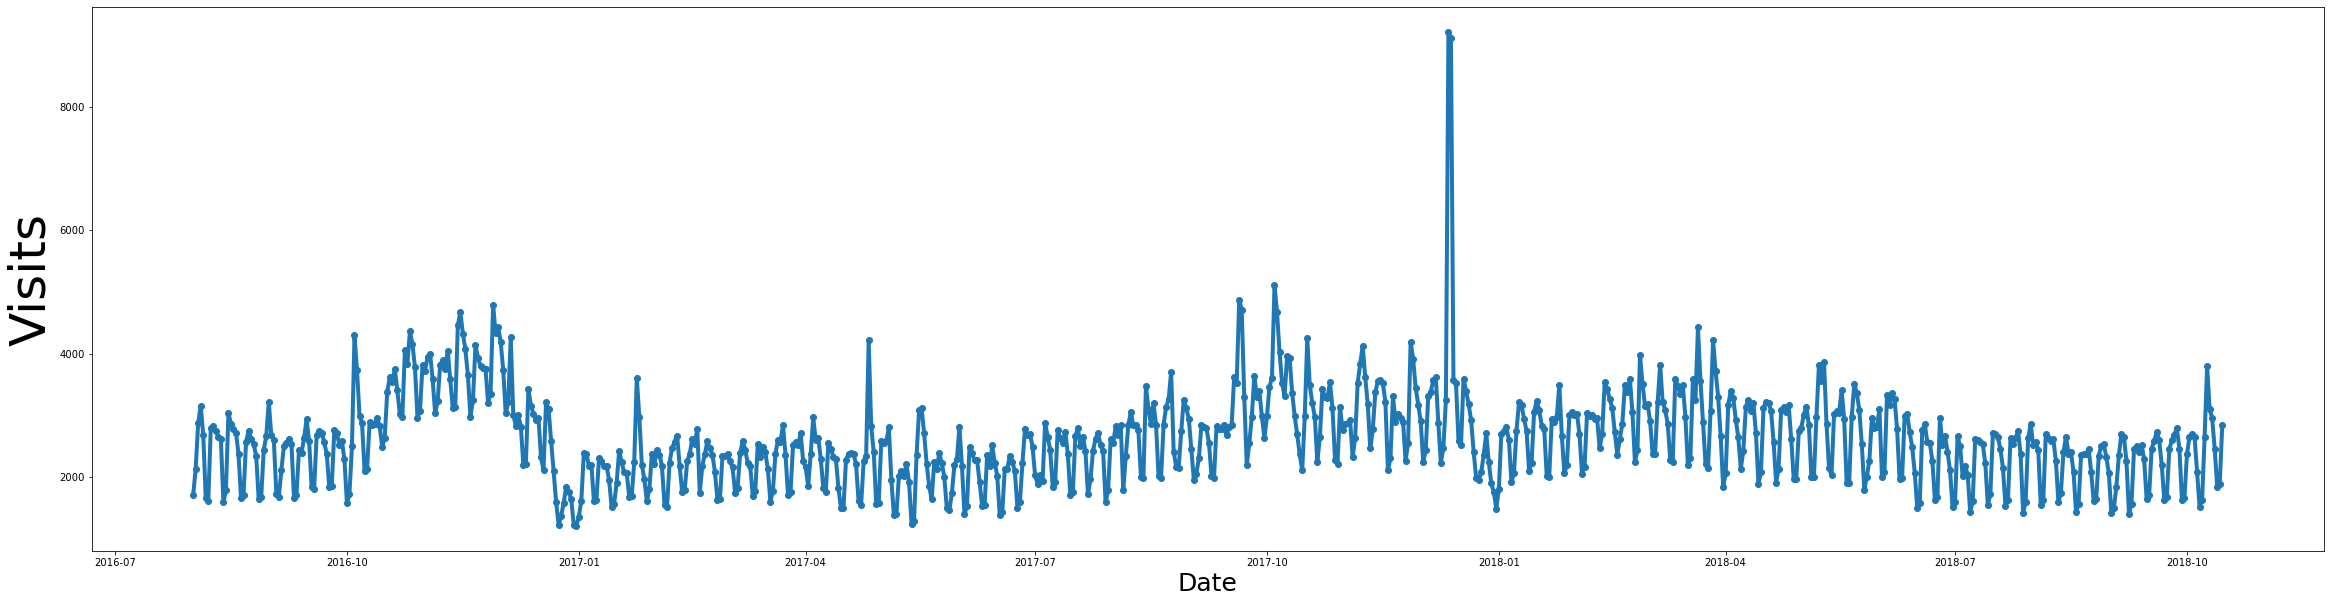

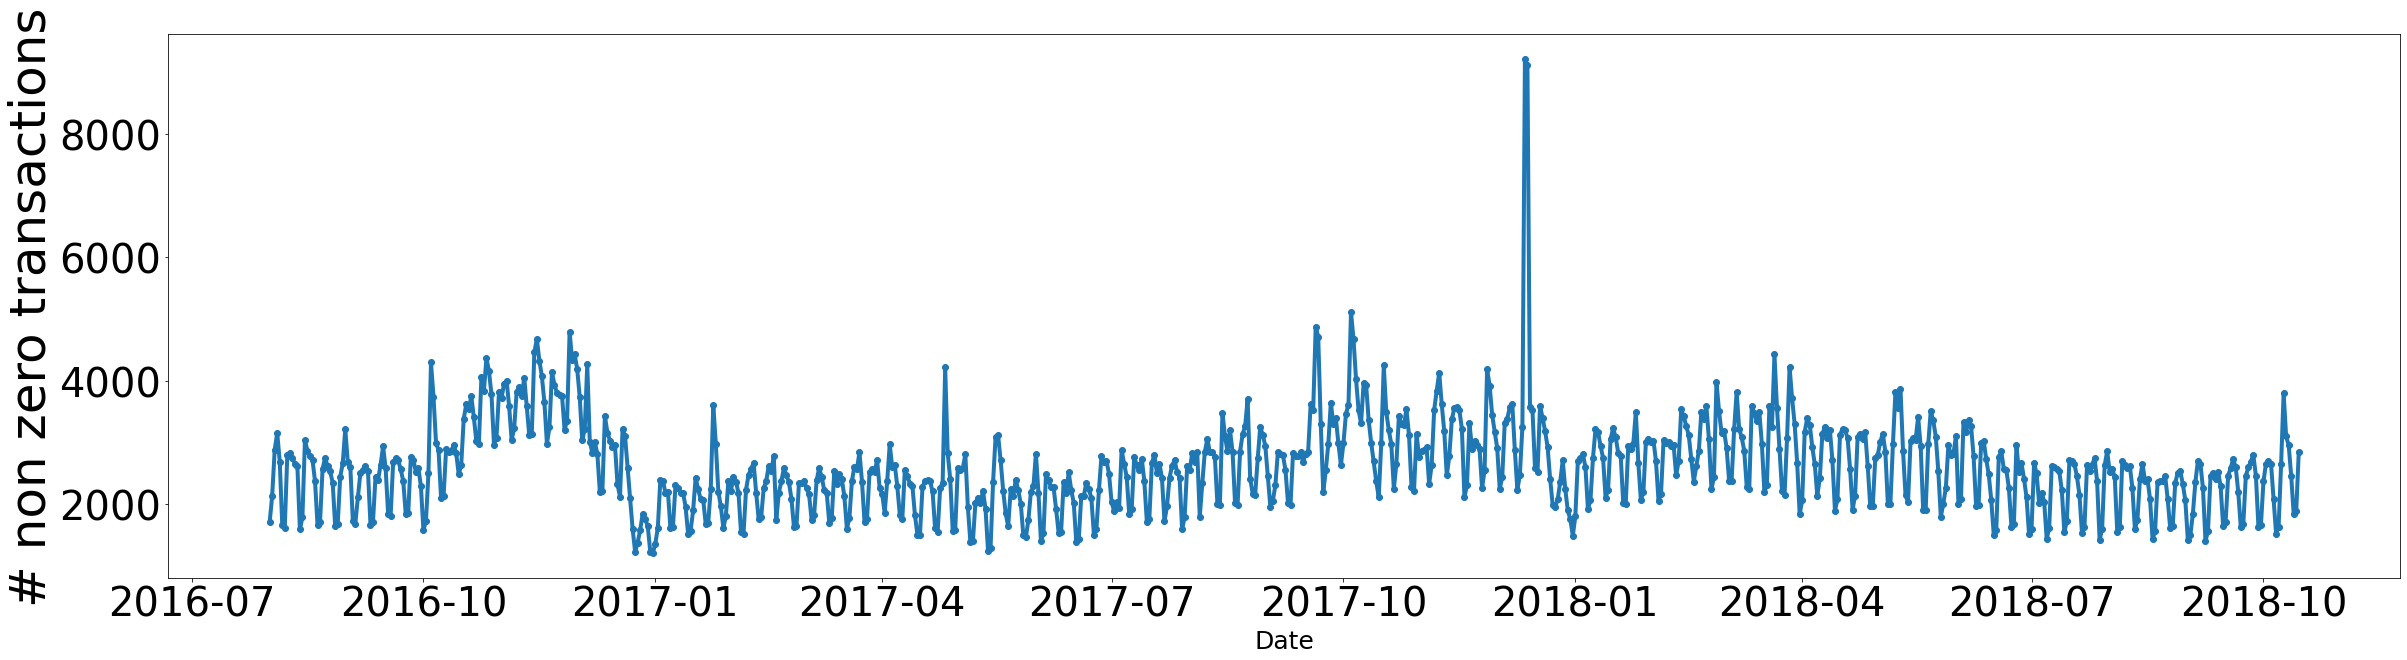

In [10]:
counts_group_date = df.groupby('date').count()
counts_group_date.reset_index(inplace=True) #it will create indexes from zero to len(dataframe)


# plot for no.of visits in each date :

plt.figure(figsize=(40,10))
plt.plot_date(x = counts_group_date['date'], y = counts_group_date['fullVisitorId'],linestyle='solid',linewidth=4)
plt.xlabel('Date',fontsize=25)
plt.ylabel('Visits',fontsize=50)
plt.rc('xtick', labelsize=40) #increases the value's font on x-axis
plt.rc('ytick', labelsize=40) #increases the value's font on y-axis
plt.autoscale(True)
plt.show()

# plot for transcation revenue in each date :

plt.figure(figsize=(40,10))
plt.plot_date(x = counts_group_date['date'], y = counts_group_date['totals.transactionRevenue'],linestyle='solid',linewidth=4)
plt.xlabel('Date',fontsize=25)
plt.ylabel('# non zero transactions',fontsize=50)
plt.rc('xtick', labelsize=40) #increases the value's font on x-axis
plt.rc('ytick', labelsize=40) #increases the value's font on x-axis
plt.autoscale(True)
plt.show()


#### Observation:
#### In the month of december-2017 the the no.of vists and revenue are raised drastically.
####  so this one of the useful inights to the promotional team., so that they can invest more money in promotions in the month of december

In [ ]:
logging.info("visualisation finshed")